### Bab III : Menggambarkan Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
data = [int(np.random.normal(40, 6)) for i in range(100)]

In [3]:
data = pd.DataFrame(data, columns=['Data'])
Data = data.Data

#### Mean, Median, Modus

In [4]:
#Mean, median, modus
miu = np.sum(data.Data) / len(data.Data)
median = np.median(data)
modus = data.Data.value_counts().iloc[0]
print(miu,'\n',median, '\n', modus)

38.89 
 39.0 
 11


#### Dispersi


In [5]:
#Jangkauan = Range, rentang nilai
jangkauan = np.max(Data) - np.min(Data)
print(jangkauan)

#Mean Deviation = Deviasi Rata-Rata
MD = abs(Data - Data.mean()).sum() / len(Data)
print(MD.round(2))

#variance:ragam data
varians_pop = ((Data - Data.mean()) ** 2).sum() / len(Data)
varian_sample = ((Data - Data.mean()) ** 2).sum() / len(Data)-1
print(varians_pop.round(2))
print(varian_sample.round(2))

#Standard Deviaton : akar dari variansi. 
std_pop = np.sqrt(varians_pop)
std_sample = np.sqrt(varian_sample)
print(std_pop.round(2))
print(std_sample.round(2))





27
4.29
29.26
28.26
5.41
5.32


#### Ukuran posisi

{'whiskers': [<matplotlib.lines.Line2D at 0x284cc829fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x284cc84a6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x284cc829c40>],
 'medians': [<matplotlib.lines.Line2D at 0x284cc84ad60>],
 'fliers': [<matplotlib.lines.Line2D at 0x284cc855100>],
 'means': []}

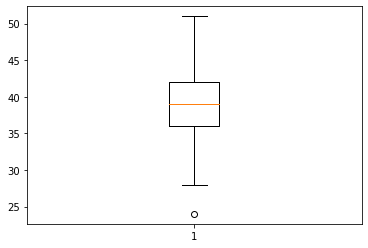

In [6]:
plt.boxplot(Data)

In [7]:
#Faktorial
class prob:
    
    def faktorialFor(n):
        hasil = 1
        for i in range(1, n + 1):
            hasil = hasil * i
        return hasil

    def faktorialRekursif(n):
        if n <= 1:
            return 1 
        else:
            hasil = n * prob.faktorialRekursif(n - 1)
        return hasil
    
    def permutasi(n, r):
        return prob.faktorialFor(n) / prob.faktorialFor(n - r)
    
    def kombinasi(n, r):
        return prob.faktorialRekursif(n) / (prob.faktorialRekursif(r) * prob.faktorialFor(n - r))
    

In [8]:
prob.permutasi(7, 3)

210.0

In [9]:
prob.kombinasi(7,3)

35.0

### Probabilitas Distribusi Diskrit

Menghitung mean:

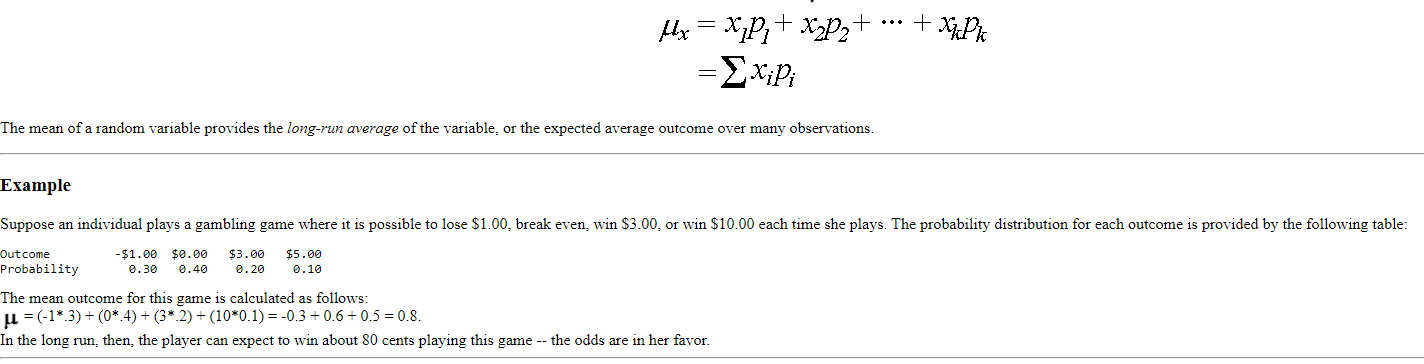

x = nilai yang muncul<br>px = probabilitas nilainya

Menghitung variansi dan standar deviasi Probabilitas Diskrit
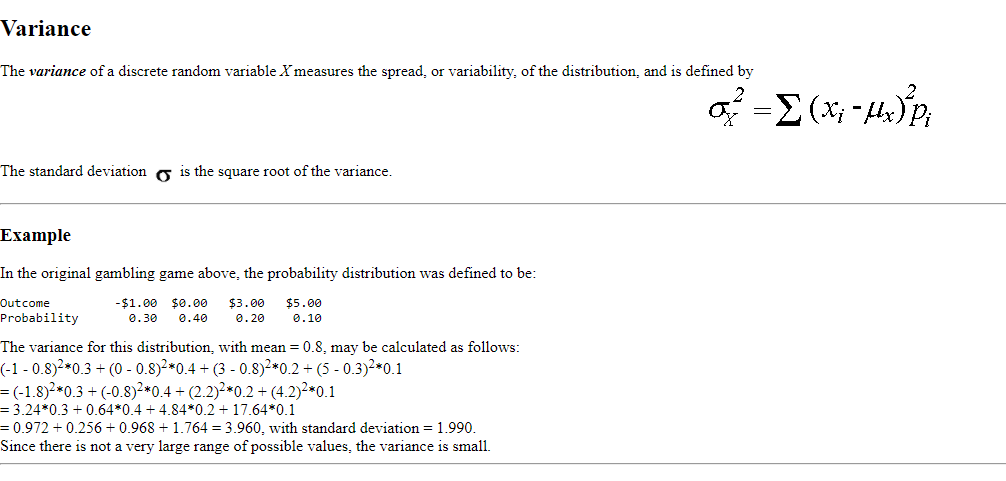

#### Probabilitas Binomial

Probabilitas binomial: hanya ada dua kemungkinan, seperti berhasil atau tidak, kepala atau ekor, ganteng atau tidak.
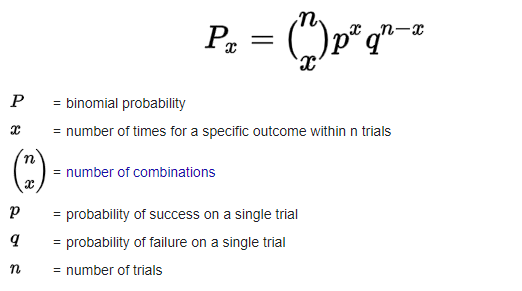

Itu kombinasi ya. Marikita bikin fungsi baru: binomHitung

In [10]:
#fungsi menghitung probabilitas binomial
def binomHitung(n, p):
    '''
    Menghitung nilai probabilitas binomial dari setiap nilai sukses yang keluar
    n = jumlah percobaan
    p = nilai probabilitas keberhasilan, harus antara 0 dan 1
    '''
    binom_dict = dict()
    binom_value = list()
    for i in range(n + 1):
        value = prob.kombinasi(n, i) * (p ** i) * ((1 - p) ** (n - i))
        value = np.round(value, 4)
        binom_value.append(value)
        binom_dict[i] = binom_value[i]
        
    return binom_dict

In [11]:
binom_test = binomHitung(5, 0.4)
binom_cumsum = np.cumsum(list(binom_test.values()))
print(binom_test)
print(binom_cumsum)

{0: 0.0778, 1: 0.2592, 2: 0.3456, 3: 0.2304, 4: 0.0768, 5: 0.0102}
[0.0778 0.337  0.6826 0.913  0.9898 1.    ]


Menghitung mean dan variance


In [12]:
def binomMeanVar(n, p):
    '''
    Menghitung mean dan variance dari Distribusi Binomial
    n = jumlah percobaan
    p = nilai probabilitas keberhasilan, harus di antara 0 dan 1
    '''
    mu = n * p
    variance = n * p * (1 - p)
    return mu, variance

In [13]:
binomMeanVar(5, 0.4)

(2.0, 1.2)

Plotting PMF dan CDF

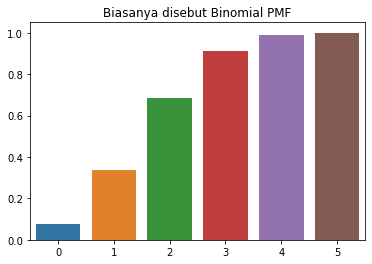

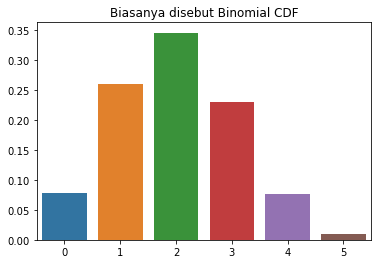

In [14]:
import seaborn as sns

sns.barplot(x = np.arange(0, 6), y = binom_cumsum)
plt.title('Biasanya disebut Binomial PMF')
plt.show()

sns.barplot(x = list(binom_test.keys()), y = list(binom_test.values()))
plt.title('Biasanya disebut Binomial CDF')
plt.show()


#### Distribusi Probabilitas Hipergeometris

Hipergeometris memiliki ciri-ciri:
1. Hasil setiap percobaan dari eksperimen digolongkan menjadi satu atau dua kategori yang saling lepas-berhasil/gagal
2. Variabel acak: jumlah keberhasilan dalam sejumlah percobaan.
3. Percobaan tersebut tidak saling bebas.
4. Diasumsikan dengan mengambil contoh dari suatu populasi terbatas tanpa pengembalian dan n/N > 0.05. Jadi, probabilitas keberhasilan berubah setiap percobaan

Menghitung probabilitas geometri

In [15]:
def geometriHitung(N, S, n):
    '''
    Menghitung probabilitas geometri
    N = jumlah populasi
    S = jumlah keberhasilan populasi
    n = jumlah sampel/percobaan
    x = jumlah keberhasilan pada sampel, contoh: 0, 1 dst
    '''
    geometri_dict = dict()
    geometri_value = list()
    if N >= S:
        for i in range(0, n + 1):
            value = (prob.kombinasi(S, i) * prob.kombinasi(N - S, n - i)) / prob.kombinasi(N, n)
            value = np.round(value, 4)
            geometri_value.append(value)
            geometri_dict[i] = geometri_value[i]
        return geometri_dict
    else:
        print('Jumlah keberhasilan populasi harus kurang atau sama dengan jumlah populasi')
          

In [16]:
geometri_test = geometriHitung(50, 40, 5)
geometri_cumsum = np.cumsum(list(geometri_test.values()))
print(geometri_test)
print(geometri_cumsum.round(4))

{0: 0.0001, 1: 0.004, 2: 0.0442, 3: 0.2098, 4: 0.4313, 5: 0.3106}
[1.000e-04 4.100e-03 4.830e-02 2.581e-01 6.894e-01 1.000e+00]


#Plotting PMF dan CDF

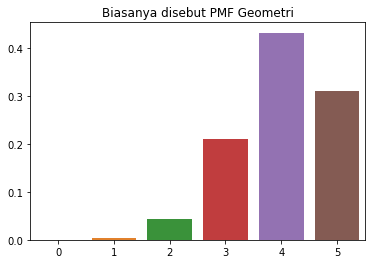

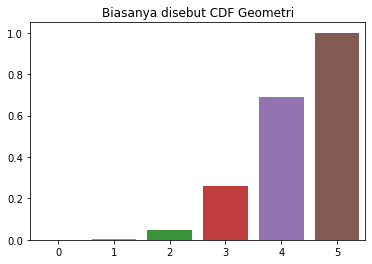

In [17]:
#PMF
sns.barplot(x = list(geometri_test.keys()), y = list(geometri_test.values()))
plt.title('Biasanya disebut PMF Geometri')
plt.show()

sns.barplot(x = list(geometri_test.keys()), y = geometri_cumsum)
plt.title('Biasanya disebut CDF Geometri')
plt.show()

#### Probabilitas Poisson

Poisson distribution memiliki ciri-ciri:
1. Variabel acaknya berupa berapa kali seuatu kmejadian terjadi selama rentang yang ditentukan
2. Probabilitas kejadian tersebut sebanding dengan ukuran rentang
3. Tidak ada pengulangan rentang dan rentang-rentangnya saling bebas

Menghitung probabilitas poisson:

In [18]:
def poissonHitung(mu, x):
    '''
    Menghitung probabilitas poisson
    mu = rata-rata kejadian berhasil pada suatu rentang
    x = jumlah kejadian berhasil
    '''
    
    poisson_dict = dict()
    poisson_value = list()
    for i in range(0, x + 1):
        value = ((mu ** i) * np.exp(-mu)) / prob.faktorialFor(i)
        value = np.round(value, 4)
        poisson_value.append(value)
        poisson_dict[i] = poisson_value[i]
    return poisson_dict

In [19]:
poisson_test = poissonHitung(3, 10)
poisson_cumsum = np.cumsum(list(poisson_test.values()))
print(poisson_test)
print(poisson_cumsum)

{0: 0.0498, 1: 0.1494, 2: 0.224, 3: 0.224, 4: 0.168, 5: 0.1008, 6: 0.0504, 7: 0.0216, 8: 0.0081, 9: 0.0027, 10: 0.0008}
[0.0498 0.1992 0.4232 0.6472 0.8152 0.916  0.9664 0.988  0.9961 0.9988
 0.9996]


#Plotting PMF dan CDF

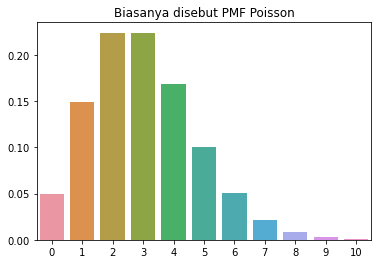

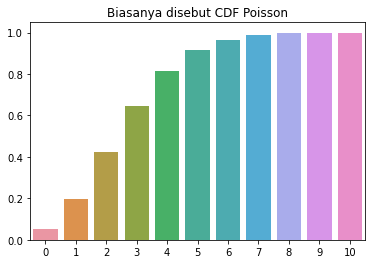

In [20]:
#PMF
sns.barplot(x = list(poisson_test.keys()), y = list(poisson_test.values()))
plt.title('Biasanya disebut PMF Poisson')
plt.show()

sns.barplot(x = list(poisson_test.keys()), y = poisson_cumsum)
plt.title('Biasanya disebut CDF Poisson')
plt.show()

### Probabilitas Kontinu

#### Probabilitas Kontinu Normal

Probabilitas Kontinu Normal memiliki ciri-ciri sebagai berikut:
1. Distribusi probabilitas normal berbentuk lonceng/gaussian kalau kata rangorang, dengan rata-rata, median, dan modus terletak di tengah distribusi. Luas total kurva sebesar 1.00
2. Probabilitas ini simetris mengenai rata-ratanya, dan menurun halus pada arah apapun dari nilai tengahnya yang disebut dengan asymptotic:kurva semakin mendekati sumbu x tetapi tidak sampai menyinggungnya, jadi ekornya memanjang dengan tak terbatas pada kedua arahnya.
3. Letak distribusi normal ditentukan oleh rata-rata mu. Dispersi dari distribusi ditentukan oleh standar deviasi, sigma.

Yang membedakan antara kontinu dan diskret adalah diskret akan menghasilkan probabilitas pada nilai tertentu, karena nilai yang bersifat data kategori, sehingga setiap nilai akan memiliki probabilitasnya masing-masing. Sedangkan pada kontinu, nilai probabilitas dihidung berdasarkan rentang dari kedua nilai, baik berdasarkan miu ataupun dari nilai-nilai tertentu.

Rumus probabilitas normal dalam dituliskan dalam fungsi python:


In [21]:
def normalProbability(bins, mu, sigma):
    '''
    Menghitung probabilitas normal kontinu
    X = dalam histogram disebut bins, rentang antar nilai
    mu = nilai rata-rata variabel acak/data
    sigma = nilai standar deviasi variabel acak/data    
    '''
    value = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu) ** 2 / (2 * sigma ** 2)))
    return value

Membuat variabel acak probabilitas normal

In [22]:
np.random.seed(42)

#menentukan mean dan standar deviasi
mu = 2000
sigma = 400
gaji_bulanan = list(int(np.random.normal(mu, sigma)) for i in range(2000))

#Membuat dataframe dari list gaji_bulanan
df = pd.DataFrame(gaji_bulanan, columns=['gaji'])
print(df.head())

   gaji
0  2198
1  1944
2  2259
3  2609
4  1906


Melakukan plotting terhadap data

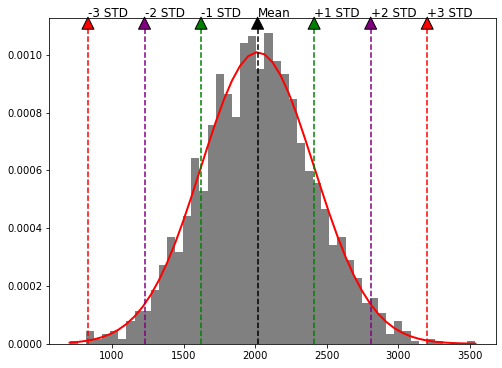

In [23]:
#menentukan mu dan sigma
mu, sigma = df.gaji.mean(), df.gaji.std()
#menentukan ukuran figure
plt.figure(figsize = (8, 6))

#membuat plot histogram distribusi dari variabel acak
bins_value, bins, _ = plt.hist(df.gaji, bins = 50, density = True, color = 'gray')

#membuat plot garis/lineplot dari probabilitasnya
value_list = plt.plot(bins, 
                      normalProbability(bins, mu = mu, 
                                        sigma = sigma),
                      linewidth = 2, color = 'r')

#Menentukan garis untuk tiap batas distribusi
plt.axvline(x = mu, ls = '--', c = 'black')
plt.axvline(x = mu - sigma, ls = '--', c = 'green')
plt.axvline(x = mu + sigma, ls = '--', c = 'green')
plt.axvline(x = mu - 2 * sigma, ls = '--', c = 'purple')
plt.axvline(x = mu + 2 * sigma, ls = '--', c = 'purple')
plt.axvline(x = mu - 3 * sigma, ls = '--', c = 'red')
plt.axvline(x = mu + 3 * sigma, ls = '--', c = 'red')

#Menentukan anotasi untuk tiap garis
plt.annotate('Mean', (mu, 0.00113),
             xytext = (mu, 0.00113),
             arrowprops = dict(facecolor = 'black'),
             fontsize = 12)
plt.annotate('-1 STD', (mu - sigma, 0.00113),
             xytext = (mu - sigma, 0.00113),
             arrowprops = dict(facecolor = 'green'),
             fontsize = 12)
plt.annotate('+1 STD', (mu + sigma, 0.00113),
             xytext = (mu + sigma, 0.00113),
             arrowprops = dict(facecolor = 'green'),
             fontsize = 12)
plt.annotate('-2 STD', (mu - 2 * sigma, 0.00113),
             xytext = (mu - 2 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'purple'),
             fontsize = 12)
plt.annotate('+2 STD', (mu + 2 * sigma, 0.00113),
             xytext = (mu + 2 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'purple'),
             fontsize = 12)
plt.annotate('-3 STD', (mu - 3 * sigma, 0.00113),
             xytext = (mu - 3 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'red'),
             fontsize = 12)
plt.annotate('+3 STD', (mu + 3 * sigma, 0.00113),
             xytext = (mu + 3 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'red'),
             fontsize = 12)
plt.show()

#### Menghitung daerah dalam kurva normal menggunakan z-score

Z-score adalah ukuran simpangan data dari nilai rata-ratanya yang diukur dalam satuan standar deviasi. Biasanya disebut dengan Standar score. Jika nilai berada di atas nilai rata-rata, maka akan bernilai positif. Sebaliknya jika berada di bawah nilai rata-ratanya, makan akan bernilai negatif.

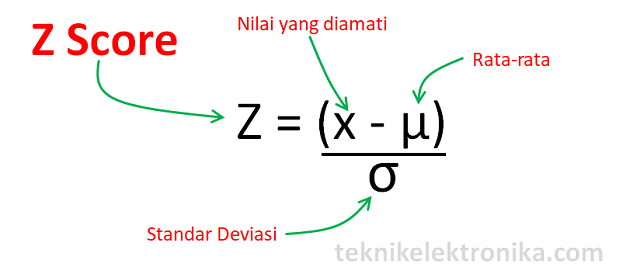



In [24]:
class areaKurva:
    '''
    Class berisi penghitungan z_score dan probabilitas area
    '''
    def zScore(x, mu = 0, sigma = 0, data = None):
        '''
        Menghitung z-score dari suatu nilai
        x = nilai yang diamati
        mu = mean
        sigma = standard deviasi
        data = jika mu dan sigma bernilai default, maka data wajib diisi dengan data
        '''
        if (mu > 0 and sigma > 0) and data is None:
            z_score = (x - mu) / sigma
            return z_score
        elif (mu == 0 and sigma == 0) and data is not None:
            z_score = (x - data.mean()) / data.std()
            return z_score
        else:
            raise Exception('Data input tidak benar!')
        
    def probsArea(x1, x2, mu = 0, sigma = 0, data = None):
        '''
        Menghitung probabilitas dalam dua titik
        x1: nilai x1
        x2: nilai x2
    
        Memilih data input berupa mu-sigma, atau data
        mu: nilai tengah
        sigma: standard deviasi
        data: jika mu dan sigma tidak diisi, maka data harus dicantumkan
        '''
        #Scipy
        from scipy import stats
    
        #Melakukan pengondisian input, apakah menggunakan mu-sigma, atau data
        if (mu > 0 and sigma > 0) and data is None:
            zscore_x1 = areaKurva.zScore(x1, mu = mu, sigma = sigma)
            zscore_x2 = areaKurva.zScore(x2, mu = mu, sigma = sigma)
            x1_percentile = stats.norm.cdf(zscore_x1)
            x2_percentile = stats.norm.cdf(zscore_x2)
            prob = abs(x2_percentile - x1_percentile)
            return prob
        elif (mu == 0 and sigma == 0) and data is not None:
            zscore_x1 = areaKurva.zScore(x1, data = data)
            zscore_x2 = areaKurva.zScore(x2, data = data)
            x1_percentile = stats.norm.cdf(zscore_x1)
            x2_percentile = stats.norm.cdf(zscore_x2)
            prob = abs(x2_percentile - x1_percentile)
            return prob
        else:
            raise Exception('Data input tidak benar!')

In [25]:
gaji_prob = areaKurva.probsArea(x1 = 1600, x2 = 1800, data = df.gaji)
gaji_prob

0.1456165956263885

#### Pendekatan Distribusi Normal terhadap Probabilitas Binomial

Pendekatan distribusi normal dapat digunakan untuk mengganti distribusi binomial karena apabila jumlah percobaan atau n besar, maka distribusi binomial akan semakin mendekati distribusi normal. Pendekatan ini dapat dilakukan ketika n * p, di mana n = jumlah percobaan, dan p = probablitasnya, serta n(1 - p) keduanya sedikitnya 5. Sebelum itu, kriteria distribusi binomial harus terpenuhi, yakni:

1. Hanya ada dua hasil yang saling lepas pada suatu eksperimen: 'berhasil' dan 'gagal'.
2. Distribusi diperoleh dari menghitung angka keberhasilan dalam sejumlah percobaan.
3. Probabilitas suatu keberhasilan, p, tetap sama dari percobaan ke percobaan.
4. Setiap percobaan saling bebas.

Untuk menunjukkan penerapan distribusi normal terhadap distribusi binomial, maka perlu dilakukan <b>faktor koreksi kontinuitas, yakni dengan menambah atau mengurangi nilai X (hasil spesifik yang ditentukan dalam percobaan sejumlah n) sebesar 0.5, tergantung dari pertanyaan/keinginan yang dicari, ketika distribusi probabilitas diskret melalui distribusi probabilitas kontinu</b>.

Untuk menerapkan faktor koreksi ini, terdapat 4 kasus yang biasa muncul:
1. Untuk probabilitas <i>sedikitnya</i> X terjadi, gunakan area di atas (X - 0.5)
2. Untuk probabilitas bahwa <i>lebih dari</i> X terjadi, gunakan area di atas (X + 0.5)
3. Untuk probabilitas bahwa <i> X atau kurang dari X</i> terjadi, gunakan area di bawah (X + 0.5)
4. Untuk probabilitas bahwa <i> kurang dari X</i> terjadi, gunaan area di bawah (X - 0.5)

 

Kita akan mencoba mengerjakan suatu soal:

<b>Diketahui</b>: n = 80, X = 60, p = 0.7<br>
<b>Ditanyakan</b>: Bagaimana probabilitasnya, jika X dari n akan kembali?<br>
<b>Jawab</b>:

Jumlah percobaan (n) = 80<br>
Nilai probabilitas (p) = 0.7<br>
Hasil spesifik yang ditentukan (X) = 60<br>

<u>Membuat plot Binomial pmf</u>

In [26]:
#Preprocessing
#Melakukan penghitungan dengan X mulai dari 0 hingga n
binom_n = binomHitung(n = 80, p = 0.7)

#Eliminasi probabilitas yang yang hasil pembulatannya bernilai 0
for k, v in list(binom_n.items()):
    if v == 0:
        del binom_n[k]

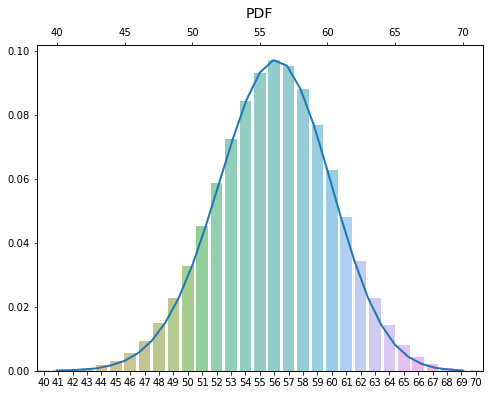

In [27]:
#Plotting PMF
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = list(binom_n.keys()), 
            y = list(binom_n.values()), ax = ax, alpha = 0.6)
ax1 = ax.twiny()
sns.lineplot(x = list(binom_n.keys()), linewidth = 2,
             y = list(binom_n.values()), ax = ax1)
plt.title('PDF', size = 14, pad = 10)
plt.show()


<u>Menghitung mean dan standar deviasi, serta z-score</u>

Untuk z-score, kita akan menggunakan koreksi X-0.5, untuk menghitung probabilitas sedikitnya nilai X terjadi.

In [28]:
#Menghitung mean dan std
mu, var = binomMeanVar(n=80, p=0.7)
std = np.sqrt(var).round(4)
print(mu)
print(std)

56.0
4.0988


In [29]:
#Menghitung z-score
z_score = areaKurva.zScore(x = 60-0.5, 
                           mu = mu,
                           sigma = std).round(4)
print('Nilai z_score =', z_score)

#Menghitung nilai probabilitas dari z_score
probs = stats.norm.cdf(z_score).round(4)
print('Probabilitas dari nilai z_score =', 1 - probs)

Nilai z_score = 0.8539
Probabilitas dari nilai z_score = 0.1966


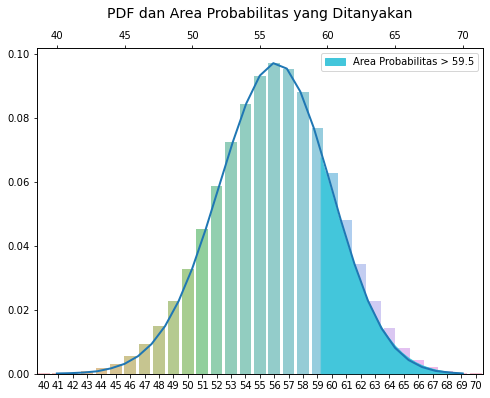

In [30]:
#Re-plotting PMF
x_area = np.arange(59.5, 70.5, 0.5)
y_area = normalProbability(x_area, mu, std)
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = list(binom_n.keys()), 
            y = list(binom_n.values()), ax = ax, alpha = 0.6)
ax1 = ax.twiny()
sns.lineplot(x = list(binom_n.keys()), linewidth = 2,
             y = list(binom_n.values()), ax = ax1)
ax1.fill_between(x_area, y_area, color = '#43C6DB', label = 'Area Probabilitas > 59.5')
plt.legend()
plt.title('PDF dan Area Probabilitas yang Ditanyakan', size = 14, pad = 13)
plt.show()


#### Distribusi Eksponensial

Distribusi ini menggambarkan waktu antar tiap kejadian dalam urutannya, dengan tindakan yang terjadi saling bebas pada tingkat konstan per satuan lamanya waktu. Selalu bernilai positif. Contoh Eksponensial adalah sebagai berikut:
1. Lamanya waktu yang dibutuhkan untuk melayani pelanggan.
2. Lama menyalanya komponen listrik.
3. Waktu hingga panggilan telepon berikutnya diangkat oleh pusat layanan pelanggan.


Distribusi ini memiliki hubungan dengan distribusi diskret Poisson. Keduanya sama-sama memiliki distribusi asimetris positif. Selain itu, dalam Poisson, dibutuhkan parameter mu(mean/rata-rata) untuk menghitung probabilitasnya. Sedangkan, parameter Eksponensial adalah theta(θ) atau lamda(λ) yang merupakan 1/mu. Rumus yang digunakan:
1. Probabilitas X atau P(X)<br>
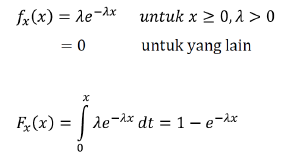

2. Mencari Probabilitas Distribusi Eksponensial Berdasarkan Suatu Nilai<br>
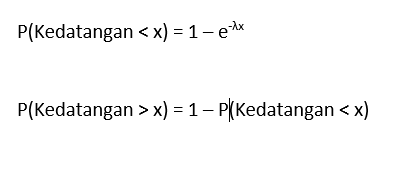
3. Mean dan Standar Deviasi (memiliki rumus yang sama) = <b>1 / λ</b>

Membuat fungsi untuk menghitung menampilkan plot distribusi dan area berdasarkan suatu nilai

In [31]:
class exponent:
    '''
    Class dari fungsi distribusi dan area kumulatif suatu nilai
    '''
    def __init__(self, lamda, X):
        '''
        Inisiasi parameter yang dibutuhkan dalam distribusi eksponensial
        lamda = tingkatan/rate parameter
        X = nilai yang diinginkan
        '''
        self.lamda = lamda
        self.X = X
        
    def probability(self):
        '''
        Menghitung probabilitas X
        '''
        probs = self.lamda * np.exp(-self.lamda * self.X)
        return probs
    
    def cumulative(self):
        '''
        Menghitung area kumulatif berdasarkan nilai X
        '''
        cums = 1 - np.exp(-self.lamda * self.X)
        return cums
        

In [32]:
X = np.arange(0, 100, 1)
exp_tes = exponent(1/6, X)
exp_prob = exp_tes.probability()
exp_cum = exp_tes.cumulative()

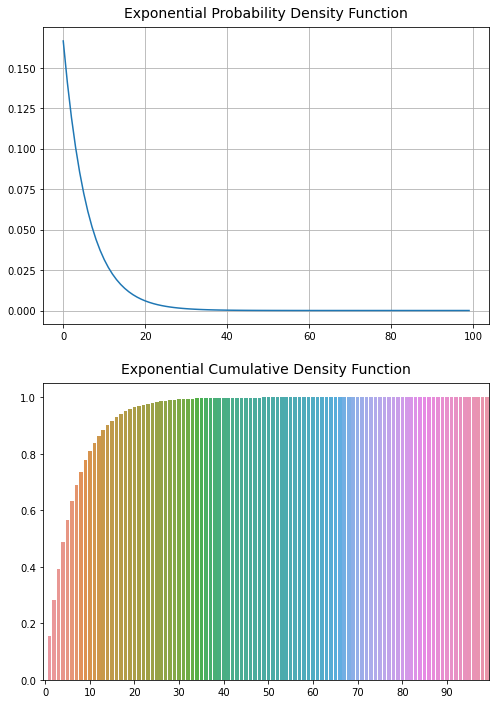

In [33]:
#Plot Probabilitas dan CDF
fig, ax = plt.subplots(2, 1, figsize = (8, 12))

sns.lineplot(x=X, y=exp_prob, ax=ax[0])
ax[0].grid('True')
ax[0].set_title('Exponential Probability Density Function', size = 14, pad = 10)
sns.barplot(x = X, y = exp_cum, ax = ax[1])
ax[1].set_xticks(np.arange(0, 100, 10))
ax[1].set_title('Exponential Cumulative Density Function', size = 14, pad = 10)
plt.show()

### Central Limit Theorem
Central limit theorem atau dalam bahasa Indonesia berarti teorema nilai tengah, adalah sebuah teorema yang menyatakan bahwa pada sampel acak besar, bentuk distribusi sampling rata-rata sampel mendekati distribusi probabilitas normal. Biasanya mulai dari jumlah pengamatan n dalam sampel sebanyak 10-30 atau lebih akan terlihat normal. Semakin banyak jumlah pengamatan, akan semakin menghiraukan distribusi populasinya.

#### Belajar melalui contoh 
Kita akan memulai belajar tentang CLT melalui random variable dari Python. Tahapan pertama adalah menentukan data.

In [34]:
#Membuat data untuk CLT
clt_data = list(np.random.exponential(scale = 6, size = 100))
clt_data = pd.DataFrame(clt_data, columns=['data'])


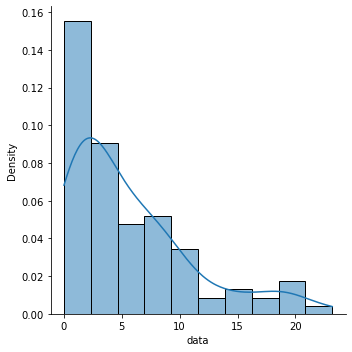

In [61]:
sns.displot(x = clt_data['data'], kde = True, stat = 'density')
plt.show()

In [36]:
#Menggunakan fungsi sendiri
exponent_data = exponent(lamda=1/6, X=np.arange(0, 100, 1)).probability()

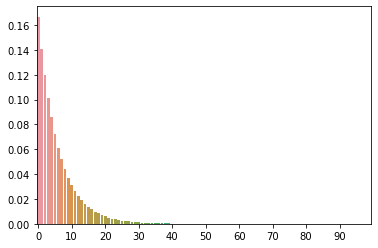

In [62]:
sns.barplot(x = np.arange(0, len(exponent_data), 1), y = exponent_data)
plt.xticks(np.arange(0, 100, 10))
plt.show()

#### Menentukan sampel.
Kita akan melakukan sampling secara acak dengan bantuan library Numpy karena data yang digunakan bersifat 1-dimensi. Jika data lebih dari 1-D, bisa menggunakan Pandas. Cek dokumentasi untuk lebih lanjut.

In [38]:
#Menghitung kombinasi 30 sampel
n_comb = prob.kombinasi(len(clt_data), 30)
print('Jumlah kombinasi pengamatan suatu sampel dengan N = 100 dan n = 30 sebesar', n_comb, '\n')

#Menghitung rata-rata populasi dan standar deviasinya
print(clt_data.describe().data[[1, 2]])

Jumlah kombinasi pengamatan suatu sampel dengan N = 100 dan n = 30 sebesar 2.9372339821610947e+25 

mean    5.60712
std     5.36208
Name: data, dtype: float64


In [39]:
#Membuat fungsi sampling
def sampling(data, nobs, s):
    '''
    Melakukan sampling terhadap suatu data series data 
    dengan jumlah pengamatan n, dan jumlah sampel s
    Required: Numpy Library
    data = data series
    nobs = jumlah pengamatan
    s = jumlah sampel
    '''
    data_dict = dict()    
    if nobs < len(data):
        for i in range(1, int(s) + 1):
            dict_value = np.random.choice(data, nobs)           
            data_dict["sample_" + str(i)] = dict_value
            
        df_sample = pd.DataFrame.from_dict(data= data_dict)
        return df_sample
    else:
        raise Exception('Jumlah nobs tidak boleh lebih dari atau sama dengan populasi data')
        
    

In [55]:
df_sample = sampling(clt_data.data, 30, 25)
df_sample.describe()

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,...,sample_16,sample_17,sample_18,sample_19,sample_20,sample_21,sample_22,sample_23,sample_24,sample_25
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,4.109697,4.578810,6.314894,5.934278,7.129142,4.794731,6.374067,4.010330,4.615079,5.702111,...,5.238202,5.150877,5.447015,4.899875,6.380242,4.828625,4.477371,5.402050,5.184824,5.039709
std,3.964787,3.884825,4.542558,5.761189,5.391459,4.613460,5.763043,4.170784,4.929656,4.641654,...,5.001680,4.396317,5.267295,5.990897,6.299488,5.092603,3.850913,5.649538,5.104953,4.750413
min,0.309187,0.000808,0.296314,0.287910,0.409736,0.022963,0.000808,0.026237,0.309187,0.022963,...,0.388445,0.026237,0.287910,0.022963,0.000808,0.000808,0.022963,0.022963,0.309187,0.022963
25%,1.719292,1.118961,2.867411,2.175426,3.373609,1.949242,1.988474,1.719292,1.760350,2.678626,...,1.206325,1.724179,0.821469,0.431629,1.071709,1.750518,1.578178,2.009505,0.821469,0.757592
50%,2.433270,3.509515,5.715945,4.244973,5.983999,3.039569,4.365025,2.667730,2.760256,4.834865,...,4.124403,4.088264,4.230160,2.617708,5.207796,2.942696,3.832520,3.274737,3.627901,3.600653
75%,6.705676,7.294825,8.239840,7.474007,10.113779,6.442373,9.239889,5.076060,7.365015,7.474007,...,7.177618,7.902876,7.350820,6.843740,8.790710,5.894832,6.698872,7.350820,8.055821,7.490601
max,14.193852,13.170951,15.889756,23.174004,18.067843,20.296758,18.851463,18.621937,23.174004,18.851463,...,18.621937,18.067843,19.958502,23.174004,20.296758,18.851463,14.193852,20.296758,20.296758,18.851463


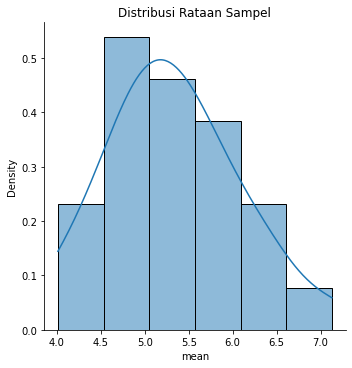

In [63]:
sns.displot(df_sample.describe().iloc[1], stat = 'density', kde = True)
plt.title('Distribusi Rataan Sampel')
plt.show()

In [64]:
#Menampilkan Mu dari rataan sampel(mean dalam mean sampel) & standar deviasinya
mu_sample_mean = np.mean(df_sample.describe().iloc[1])
standard_error = clt_data.data.std() / np.sqrt(len(df_sample))

print('Rata-rata dari rataan sampel adalah sebesar', np.round(mu_sample_mean, 5))
print('Nilai kesalahan baku dari rata-rata sebesar', np.round(standard_error, 5))
print('Nilai kesalahan sampling sebesar', np.round((mu_sample_mean - clt_data.data.mean()), 5))

Rata-rata dari rataan sampel adalah sebesar 5.32226
Nilai kesalahan baku dari rata-rata sebesar 0.97898
Nilai kesalahan sampling sebesar -0.28486


Berdasarkan hasil di atas, kita mendapatkan gambaran bahwa:
1. Distribusi populasi bersifat eksponensial, sedangkan pada distribusi rataan sampel bersifat normal. Hal ini selaras dengan Central Limit Theorem bahwa distribusi rataan sampel akan mengikuti distribusi probabilitas normal yang dipengaruhi oleh jumlah pengamatannya.
2. Kesalahan/error sampling merupakan selisih statistik sampel dengan parameter populasi yang sesuai. Dalam contoh di atas, kesalahan sampling berupa selisih rata-rata rataan sampel dengan rata-rata populasi.
3. Standard Error atau kesalahan baku dari rata-rata digunakan untuk mengukur variasi pada distribusi sampling rata-rata. Nilai antar sampel selalu sama, karena yang menjadi parameternya adalah standard deviasi populasi dan akar kuadrat dari jumlah pengamatan dari sebuah sampel.
4. Sebagai tambahan, apabila populasi mengikuti distribusi normal, distribusi sampling rata-rata juga akan mengikuti distribusi normal pada sampel berukuran berapapun. Asumsikan standar deviasi populasi diketahui, untuk menentukan probabilitas bahwa rata-rata sampel berada pada daerah tertentu, dapat menggunakan rumus <b> z = (X – μ) / (σ / √n) </b> dengan X adalah X-bar atau rata-rata sampel


